In [81]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import powerlaw as pl
import matplotlib.ticker as ticker

from osgeo import gdal

def head_tail_breaks(array, break_per=0.4):
    
    rats, cuts = [], []
    rat_in_head, head_mean, ht_index = 0, 0, 1
    
    base = np.zeros(np.shape(array)).astype(np.int8)
    image = np.copy(array)
    array = np.ravel(array)
    idx = np.where(array == -1)
    array = np.delete(array, idx)
    
    while (rat_in_head <= break_per) and (len(array) >1) and np.mean(array) > 0:

        mean = np.mean(array)
        # print(mean)
        cuts.append(mean)
        
        head_mean = array[array > mean]

        count_total = len(array)
        count_head_mean = len(head_mean)

        rat = count_head_mean / count_total
        rats.append(rat)

        if rat_in_head == 0:
            rat_in_head = rat
        else:
            rat_in_head = np.mean(rats)

        if rat_in_head < break_per:
            ht_index += 1
        array = head_mean

    cn_list = cuts[0:-1]
    print(cn_list)
    del array
    
    for i, m in enumerate(cn_list):
        
        if i==len(cn_list)-1:
            condition = (image >= m)

        else:
            condition = (image >= m) & (image < cn_list[i+1])
        himg = np.where(condition, i+1, 0)
        
        base[himg!=0]=0
        base = base + himg
    
    return ht_index, base

In [45]:
image_path = r"D:\Data\ChinaGDP-master\Guangdong\2014.tif"
output_path = r"D:\Data\ChinaGDP-master\Guangdong\2014_ht.tif"

# 使用gdal读取文件
dataset = gdal.Open(image_path)
band = dataset.GetRasterBand(1)
data = band.ReadAsArray()
transform = dataset.GetGeoTransform()
nodata_value = band.GetNoDataValue()
data[data == nodata_value] = -1

In [86]:
ht, htimg = head_tail_breaks(data)
htimg += 1
htimg[data == -1] = -1

[36.7064, 384.68372, 1251.7068, 2736.2048, 4617.775, 6593.99, 8292.337, 9183.857, 9458.413, 9685.321, 9806.7295]


In [95]:
ht_arr = np.ravel(htimg)
idx = np.where(ht_arr == -1)
ht_arr = np.delete(ht_arr, idx)
ht_arr = np.sort(ht_arr)[::-1]

arr_1d = np.ravel(data)
idx = np.where(arr_1d == -1)
arr_1d = np.delete(arr_1d, idx)
arr_1d = np.sort(arr_1d)[::-1]

# Calculate ranks and sort data
ranks = np.arange(0, len(arr_1d))
values = np.sort(arr_1d)[::-1]/1000 + 0.2

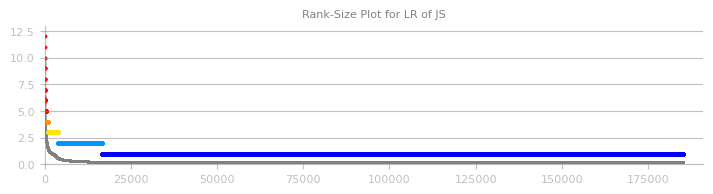

In [97]:
stride = 1

# Create the rank-size plot
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(figsize=(8.5, 1.8))

ax.scatter(ranks[::stride], values[::stride], alpha=0.1, s=1, c='gray')

# 获取不同 y 值对应的颜色
colors = [(1, 0, 0), (1, 0, 0), (1, 0, 0), 
          (1, 0, 0), (1, 0, 0), (1, 0, 0),
          (1, 0, 0), (1, 0, 0), (1, 150/255, 0), 
          (255/255, 230/255, 0/255), (0, 150/255, 1), (0, 0, 1)][::-1]

for y_val, color in zip(np.unique(ht_arr), colors):
    mask = (ht_arr[::stride] == y_val)
    ax.scatter(ranks[::stride][mask], ht_arr[::stride][mask], alpha=1, color=color, s=10, label=f'Y={y_val}', marker='.')


ax.set_xlim(0, 191000)
ax.set_ylim(0, 13)

# Set axis and grid properties (unchanged from your code)
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.yaxis.get_major_formatter().set_scientific(True)
# ax.yaxis.get_major_formatter().set_powerlimits((0, 0))
# ax.spines['bottom'].set_visible(False)

# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.xaxis.get_major_formatter().set_scientific(True)
# ax.xaxis.get_major_formatter().set_powerlimits((0, 0))

# 设置轴的颜色
ax.tick_params(axis='both', colors=(0.5, 0.5, 0.5, 0.5))
ax.spines['left'].set_color((0.5, 0.5, 0.5, 0.5))
ax.spines['bottom'].set_color((0.5, 0.5, 0.5, 0.5))

# 移除右侧和上侧的框线
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 只保留左侧和下侧的网格线
ax.yaxis.grid(True, linestyle='-', color=(0.5, 0.5, 0.5), alpha=0.5)

# Title
plt.title('Rank-Size Plot for LR of JS', color='gray', fontsize=8)

# Add legend
# ax.legend()
# ht_arr.min()
plt.show()

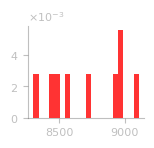

In [126]:
i = 8

# Create the rank-size plot
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(figsize=(1.5, 1.2))

ax.hist(data[htimg==i], color=colors[i-1], bins=20, alpha=0.8, density=True)

# 设置轴的颜色
ax.tick_params(axis='both', colors=(0.5, 0.5, 0.5, 0.5))
ax.spines['left'].set_color((0.5, 0.5, 0.5, 0.5))
ax.spines['bottom'].set_color((0.5, 0.5, 0.5, 0.5))

# 移除右侧和上侧的框线
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((0, 0))

plt.show()
